In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from collections import Counter 
from skimage.feature import hog

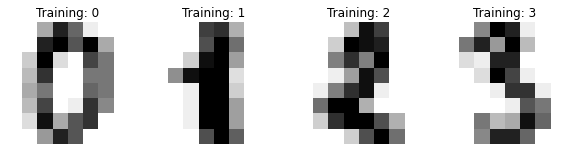

In [2]:
digits =load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [3]:

n_samples = len(digits.images)

In [4]:
data = digits.images.reshape((n_samples,-1))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [7]:
Model = MLPClassifier(activation='relu', hidden_layer_sizes=(200, 200), alpha = 0.3)
Model.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.3, hidden_layer_sizes=(200, 200))

In [8]:

print("Training Score :: {}\n".format(Model.score(X_train, y_train)))
print("Testing Score :: {}\n".format(Model.score(X_test, y_test)))

Training Score :: 1.0

Testing Score :: 0.949944382647386



In [9]:
predicted = Model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix

In [11]:
confusion_matrix(y_test,predicted)

array([[86,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 1, 83,  0,  2,  0,  0,  0,  0,  1,  4],
       [ 0,  0, 86,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 78,  0,  3,  0,  3,  4,  1],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 86,  2,  0],
       [ 0,  3,  1,  0,  0,  2,  0,  0, 81,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 89]], dtype=int64)

In [12]:

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.95      0.91      0.93        91
           2       0.97      1.00      0.98        86
           3       0.96      0.86      0.91        91
           4       0.99      0.96      0.97        92
           5       0.92      0.96      0.94        91
           6       0.98      0.99      0.98        91
           7       0.97      0.97      0.97        89
           8       0.92      0.92      0.92        88
           9       0.87      0.97      0.92        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



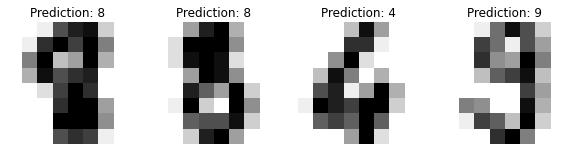

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 1 83  0  2  0  0  0  0  1  4]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  2 78  0  3  0  3  4  1]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 86  2  0]
 [ 0  3  1  0  0  2  0  0 81  1]
 [ 0  0  0  1  0  2  0  0  0 89]]


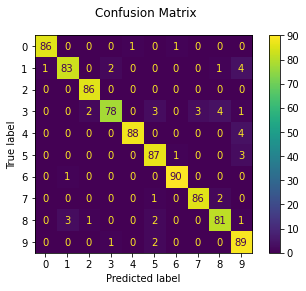

In [14]:
disp = plot_confusion_matrix(Model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:

clf = SVC(gamma=0.001)

In [17]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [18]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



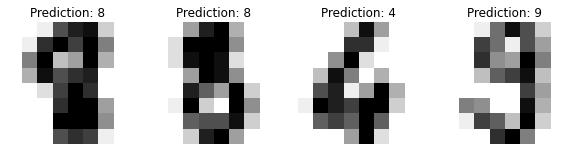

In [19]:

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [20]:

from sklearn.tree import DecisionTreeClassifier

In [21]:
clf2 = DecisionTreeClassifier()

In [22]:

clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)

In [23]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        88
           1       0.78      0.65      0.71        91
           2       0.86      0.74      0.80        86
           3       0.65      0.75      0.69        91
           4       0.83      0.87      0.85        92
           5       0.61      0.74      0.67        91
           6       0.90      0.89      0.90        91
           7       0.86      0.64      0.74        89
           8       0.61      0.67      0.64        88
           9       0.69      0.75      0.72        92

    accuracy                           0.76       899
   macro avg       0.78      0.76      0.77       899
weighted avg       0.77      0.76      0.76       899



In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
pred3 = clf3.predict(X_test)

In [27]:

print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.94      0.91      0.93        91
           2       0.99      0.92      0.95        86
           3       0.93      0.87      0.90        91
           4       0.99      0.92      0.96        92
           5       0.89      0.93      0.91        91
           6       0.98      0.99      0.98        91
           7       0.95      1.00      0.97        89
           8       0.93      0.90      0.91        88
           9       0.82      0.95      0.88        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf4 = LogisticRegression()
clf4.fit(X_train,y_train)
pred4 = clf4.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899

